In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 32.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninst

In [2]:
import torch
from ultralytics import YOLO
import os
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import zipfile
import shutil
import glob
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name()}")
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory // 1024**2} MB")
else:
    print("GPU not available")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PyTorch version: 2.6.0+cu124
CUDA available: True
GPU: Tesla T4
CUDA version: 12.4
GPU Memory: 15095 MB


In [3]:
def check_dataset_structure(base_path='/kaggle/input/dataset-smartwatch'):
    required_paths = [
        f'{base_path}/train/images', f'{base_path}/train/labels',
        f'{base_path}/valid/images', f'{base_path}/valid/labels',
        f'{base_path}/test/images', f'{base_path}/test/labels',
        f'{base_path}/data.yaml'
    ]

    missing = []
    for path in required_paths:
        if not os.path.exists(path):
            missing.append(path)

    if missing:
        print(f"Missing: {missing}")
        return False
    else:
        print("Dataset structure is correct!")
        return True

def analyze_dataset(base_path='/kaggle/input/dataset-smartwatch'):
    train_imgs = len(list(Path(f'{base_path}/train/images').glob('*')))
    train_lbls = len(list(Path(f'{base_path}/train/labels').glob('*')))
    
    valid_imgs = len(list(Path(f'{base_path}/valid/images').glob('*')))
    valid_lbls = len(list(Path(f'{base_path}/valid/labels').glob('*')))
    
    test_imgs = len(list(Path(f'{base_path}/test/images').glob('*')))
    test_lbls = len(list(Path(f'{base_path}/test/labels').glob('*')))

    print("Dataset Statistics:")
    print(f"Train: {train_imgs} images, {train_lbls} labels")
    print(f"Valid: {valid_imgs} images, {valid_lbls} labels")
    print(f"Test: {test_imgs} images, {test_lbls} labels")
    print(f"Total: {train_imgs + valid_imgs + test_imgs} images")

    with open(f'{base_path}/data.yaml', 'r') as f:
        data_config = yaml.safe_load(f)

    print(f"\nClasses: {data_config['names']}")
    print(f"Number of classes: {data_config['nc']}")

    return train_imgs > 0

check_dataset_structure()
analyze_dataset()

Dataset structure is correct!
Dataset Statistics:
Train: 2259 images, 2259 labels
Valid: 255 images, 255 labels
Test: 127 images, 127 labels
Total: 2641 images

Classes: ['Analog Watch', 'Digital Watch', 'Men-s Watch', 'Women-s Watch']
Number of classes: 4


True

In [4]:
import shutil
import os
from pathlib import Path

shutil.copytree('/kaggle/input/dataset-smartwatch', '/kaggle/working/dataset-smartwatch')

def unify_labels(label_dir):
    for txt_file in Path(label_dir).glob('*.txt'):
        with open(txt_file, 'r') as f:
            lines = f.readlines()
        
        new_lines = []
        for line in lines:
            parts = line.strip().split()
            if parts:
                parts[0] = '0'
                new_lines.append(' '.join(parts) + '\n')
        
        with open(txt_file, 'w') as f:
            f.writelines(new_lines)

unify_labels('/kaggle/working/dataset-smartwatch/train/labels')
unify_labels('/kaggle/working/dataset-smartwatch/valid/labels')
unify_labels('/kaggle/working/dataset-smartwatch/test/labels')

with open('/kaggle/working/dataset-smartwatch/data.yaml', 'w') as f:
    f.write("""path: /kaggle/working/dataset-smartwatch
train: train/images
val: valid/images
test: test/images

nc: 1
names: ['smartwatch']
""")

print("Dataset modified")

Dataset modified


In [5]:
config = {
   'data': '/kaggle/working/dataset-smartwatch/data.yaml',
   'epochs': 100,
   'batch': 32,
   'imgsz': 640,
   'device': 0,
   'project': 'smartwatch_detection',
   'name': 'kaggle_training',
   'patience': 20,
   'save_period': 10,
   'workers': 2,
}

model = YOLO('yolov8n.pt')

results = model.train(
   data=config['data'],
   epochs=config['epochs'],
   batch=config['batch'],
   imgsz=config['imgsz'],
   device=config['device'],
   project=config['project'],
   name=config['name'],
   patience=config['patience'],
   save_period=config['save_period'],
   workers=config['workers'],
   optimizer='AdamW',
   lr0=0.01,
   lrf=0.1,
   momentum=0.937,
   weight_decay=0.0005,
   warmup_epochs=3,
   cache=True,
   rect=True,
   cos_lr=True,
   close_mosaic=10,
   flipud=0.5,
   fliplr=0.5,
   degrees=15.0,
   translate=0.1,
   scale=0.2,
   shear=10.0,
   perspective=0.0,
   hsv_h=0.015,
   hsv_s=0.25,
   hsv_v=0.15,
   mosaic=1.0,
   mixup=0.1,
   copy_paste=0.1,
   auto_augment='randaugment',
   erasing=0.4,
   crop_fraction=1.0,
)

print(f"Best model: {config['project']}/{config['name']}/weights/best.pt")

WARNING ⚠️ 'crop_fraction' is deprecated and will be removed in in the future.
Ultralytics 8.3.195 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/kaggle/working/dataset-smartwatch/data.yaml, degrees=15.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.25, hsv_v=0.15, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=kaggle_training, nbs=64, nms=False, opset=None, optimize=Fal

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        255        280      0.906      0.882      0.933      0.526
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /kaggle/working/smartwatch_detection/kaggle_training
Best model: smartwatch_detection/kaggle_training/weights/best.pt


In [6]:
best_model = YOLO(f"{config['project']}/{config['name']}/weights/best.pt")

test_results = best_model.val(
    data='/kaggle/working/dataset-smartwatch/data.yaml',
    split='test',
    save_json=True,
    conf=0.65,
    iou=0.6,
)

print("Test Results:")
print(f"  mAP50: {test_results.box.map50:.3f}")
print(f"  mAP50-95: {test_results.box.map:.3f}")
print(f"  Precision: {test_results.box.mp:.3f}")
print(f"  Recall: {test_results.box.mr:.3f}")

test_images = list(Path('/kaggle/working/dataset-smartwatch/test/images').glob('*'))[:5]

print(f"\nTesting on {len(test_images)} sample images:")

for img_path in test_images:
    print(f"\nTesting: {img_path.name}")
    results = best_model(str(img_path), conf=0.65, save=True)
    
    if len(results[0].boxes) > 0:
        for box in results[0].boxes:
            conf = box.conf[0].item()
            cls = int(box.cls[0].item())
            print(f"  Detected smartwatch: {conf:.3f} confidence")
    else:
        print(f"  No smartwatch detected")

Ultralytics 8.3.195 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1010.0±190.6 MB/s, size: 41.9 KB)
val: Scanning /kaggle/working/dataset-smartwatch/test/labels... 127 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 127/127 1.5Kit/s 0.1s
val: New cache created: /kaggle/working/dataset-smartwatch/test/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 139. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 4.3it/s 1.9s0.2s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        127        139      0.935      0.309      0.631      0.438
Speed: 1.0ms preprocess, 5.8ms inference, 0.0ms loss, 1.5ms postprocess per image
Saving /kaggle/working/runs/detect/val/predictions.json...
Results saved to /kaggle/working/runs/detect/val
Test Results:
  mAP50: 0.631
  mAP50-95: 0.438
  Precision: 0.935
  Recall: 0.309

Testing on 5 sample images:

Testing: 49GHCAJ5IE97_jpg.rf.001bd1065ad4a67f3c81206679c5dcc2.jpg

image 1/1 /kaggle/working/dataset-smartwatch/test/images/49GHCAJ5IE97_jpg.rf.001bd1065ad4a67f3c81206679c5dcc2.jpg: 640x640 (no detections), 7.3ms
Speed: 1.6ms preprocess, 7.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /kaggle/working/runs/detect/predict
  No smartwatch detected

Testing: download-21-_jpeg_jpg.rf.7a3f26606a9f282a00add9e59b478f99.jpg

image 1/1 /kaggle/working/dataset-smartwatch/test/images/download-21-_jpeg_jpg.rf.7a3f26606a9f282a00add9e59b478f99.jpg: 640x640 1 smartwatch, 7.3ms
S

Training Results:


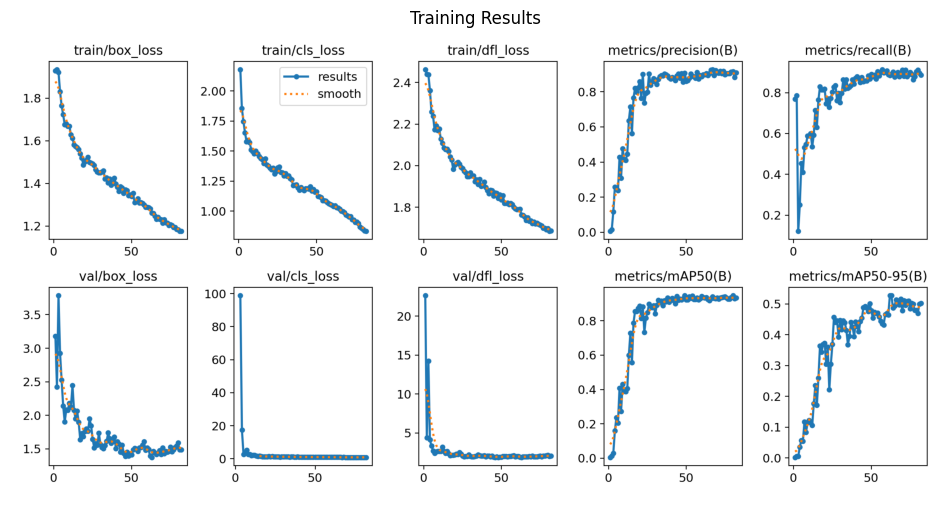


Confusion Matrix:


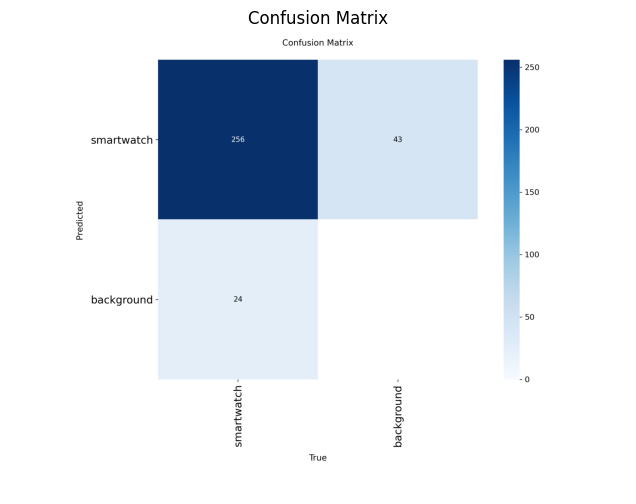


Sample Predictions:


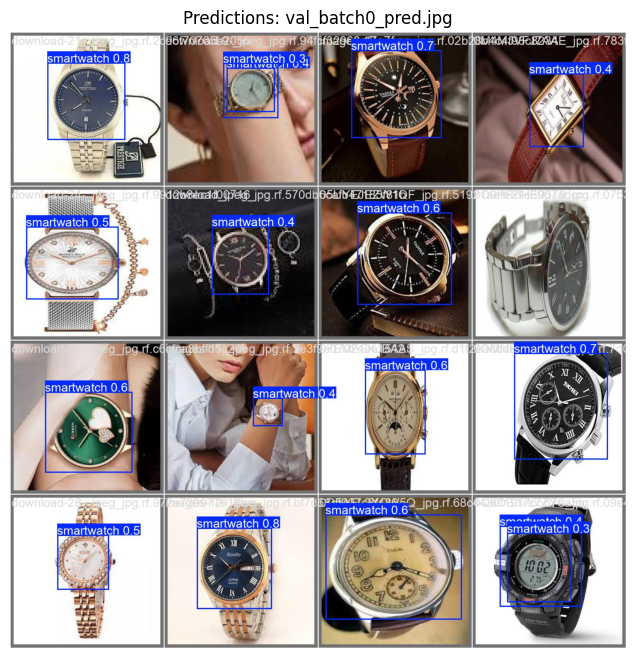

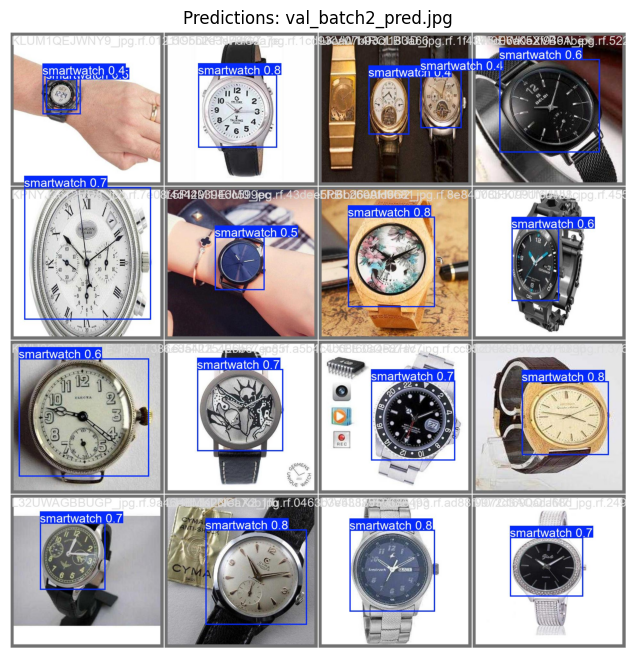

In [7]:
results_dir = f"{config['project']}/{config['name']}"

if os.path.exists(f'{results_dir}/results.png'):
    print("Training Results:")
    img = plt.imread(f'{results_dir}/results.png')
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Training Results')
    plt.show()

if os.path.exists(f'{results_dir}/confusion_matrix.png'):
    print("\nConfusion Matrix:")
    img = plt.imread(f'{results_dir}/confusion_matrix.png')
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Confusion Matrix')
    plt.show()

pred_images = glob.glob(f'{results_dir}/val_batch*_pred.jpg')
if pred_images:
    print(f"\nSample Predictions:")
    for img_path in pred_images[:2]:
        img = plt.imread(img_path)
        plt.figure(figsize=(12, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Predictions: {os.path.basename(img_path)}')
        plt.show()

In [9]:
shutil.make_archive('smartwatch_model', 'zip', results_dir)

print("Model saved!")
print("Files created:")
print(f"  - smartwatch_model.zip (complete results)")
print(f"  - {results_dir}/weights/best.pt (trained model)")

Model saved!
Files created:
  - smartwatch_model.zip (complete results)
  - smartwatch_detection/kaggle_training/weights/best.pt (trained model)
